# Predicting Customer Churn for Improved Retention and Business Growth

##1. Introduction

### Project Overview
The goal of the Customer Churn Prediction project is to develop a predictive model to identify customers who are likely to churn, that is, stop using a company's products or services. This project uses data manipulation, visualization, analysis and machine learning techniques to analyze customer data, understand the features of the dataset, identify important patterns, and predict the probability of a customer discontinuing their relationship with the business. By predicting churn in advance, businesses can implement retention strategies tailored to high-risk customers, which can ultimately improve customer loyalty and reduce churn rates.

### Objectives
The main objectives of this project are:

1. To predict customer churn using various machine learning algorithms such as logistic regression, random forest, and extreme gradient boosting.

2. To identify the most important features contributing to customer churn, including customer demographics, behavior, and account activity.

3. To evaluate the model performance and select the best approach for accurately predicting churn.

4. To provide actionable insights that can guide businesses in retaining customers and enhancing customer satisfaction.

### Dataset Description
The dataset provided for this project can be downloaded using the following link:
<br>

https://www.kaggle.com/datasets/shubh0799/churn-modelling?select=Churn_Modelling.csv

<br>

The dataset used in this project contains a variety of customer-related features. These features are essential for building and evaluating the predictive model. The dataset contains the following columns:

* **RowNumber**: The number of the row
* **CustomerId**: The unique customer id
* **Surname**: Customers Surname
* **CreditScore**: A customer's credit score.
* **Geography**: The country where the customer belongs to.
* **Gender**: The gender of the customer.
* **Age**: The customer's age.
* **Tenure**: The time of bond with company.
* **Balance**: The account balance of the customer (the amount left with them).
* **NumOfProducts**: The products they own
* **HasCrCard**: Do they have a credit card or not? (1 = Yes, 0 = No)
* **IsActiveMember**: Whether the customer is an active member of the company.
* **EstimatedSalary**: The estimated salary of the customer.
* **Exited**: The target variable indicating whether the customer has churned (1 = Churned, 0 = Stayed).

The data is pretty much clean, only a few data type conversions will be required. The cleaned dataset was then used for exploratory analysis and model development to predict the likelihood of a customer churning.

##2. Dataset Loading and Overview

### Importing Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, f1_score

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

### Defining Utility Functions

In [78]:
def create_histogram(dataset, column_name, bins=10, title=None, xlabel=None, ylabel='Frequency'):
    """
    Creates a histogram for the specified column.
    """
    if title is None:
        title = f'{column_name} Distribution'
    if xlabel is None:
        xlabel = column_name

    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[column_name], bins=bins)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12, labelpad=10)
    plt.ylabel(ylabel, fontsize=12, labelpad=10)
    plt.show()

def create_barplot(dataset, column_name, title=None, xlabel=None, ylabel=None):
    """
    Creates a bar plot showing the percentage distribution of a categorical column.
    """
    category_counts = dataset[column_name].value_counts(normalize=True) * 100
    y_max = category_counts.max() + 7.5

    if title is None:
        title = f'Percentage Distribution of {column_name}'
    if xlabel is None:
        xlabel = column_name
    if ylabel is None:
        ylabel = 'Percentage (%)'

    plt.figure(figsize=(8, 4))
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12, labelpad=10)
    plt.ylabel(ylabel, fontsize=12, labelpad=10)

    for i, value in enumerate(category_counts.values):
        plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

    plt.ylim(0, y_max)
    plt.show()

def create_boxplot(dataset, column_name, title=None, xlabel=None):
    """
    Creates a box plot for the specified column.
    """
    if title is None:
        title = f'Boxplot of {column_name}'
    if xlabel is None:
        xlabel = column_name

    plt.figure(figsize=(8.9, 4))
    sns.boxplot(x=dataset[column_name])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

def create_countplot(dataset, column_name, title=None, xlabel=None, ylabel='Count'):
    """
    Creates a count plot for the specified column.
    """
    value_counts = dataset[column_name].value_counts().sort_index()

    if title is None:
        title = f'{column_name} Distribution'
    if xlabel is None:
        xlabel = column_name

    plt.figure(figsize=(8, 4))
    sns.barplot(x=value_counts.index, y=value_counts.values)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Load the Dataset into a Pandas DataFrame

In [79]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

### Data Overview

In [80]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dimensions of the Dataset

In [81]:
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} features (columns) in the dataset.")

There are 10000 rows and 14 features (columns) in the dataset.


In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Statistical Summary of the Dataset

In [83]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Observations:

* The dataset consists of 10000 rows.
* There are 14 columns in total.
* These columns are a mix of numerical (int64 and float64) and categorical (object) data types.
* There are no missing values in the dataset.

##3. Exploring the Columns of the Dataset

### 'RowNumber' Column

In [84]:
dataset['RowNumber'].nunique()

10000

As there are 10000 rows in the dataset, hence this validates that there is a unique row number for each row in the dataset.

### 'CustomerId' Column

In [85]:
dataset['CustomerId'].nunique()

10000

As there are 10000 rows in the dataset, hence this validates that there is a unique customer ID for each customer in the dataset.

### 'CreditScore' Column

#### Distribution of 'CreditScore' Values

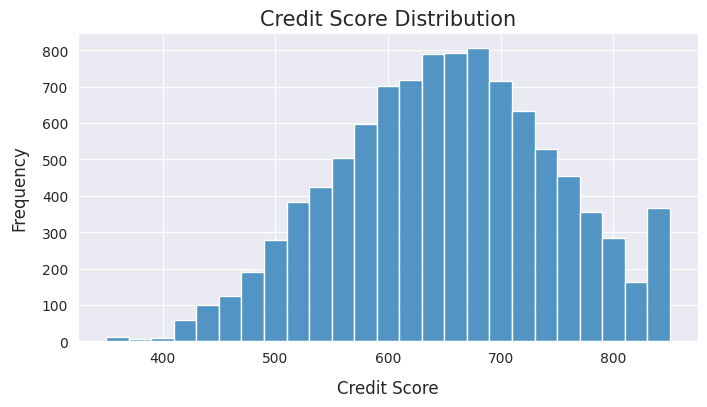

In [86]:
create_histogram(dataset, column_name='CreditScore', bins=25, title='Credit Score Distribution', xlabel='Credit Score')

The credit score distribution is approximately normal, but also has a slight left skew, which means that there are a fewer lower scores as well. Therefore, the mean is pulled to the left making it slightly lower than the median. The mean is around 650, and the standard deviation is 97.

#### Spread of 'CreditScore' Values

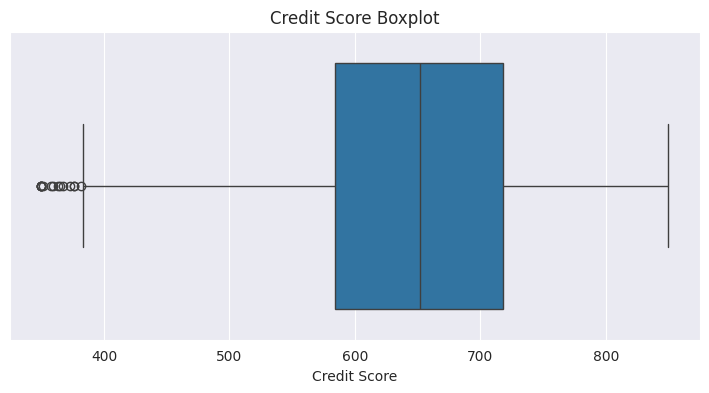

In [87]:
create_boxplot(dataset, 'CreditScore', title='Credit Score Boxplot', xlabel='Credit Score')

Nearly half of the credit score values are between 580 and 720, with a median value of 652. As evident in the boxplot, there are outliers at the left end that occur below 380.

### 'Geography' Column

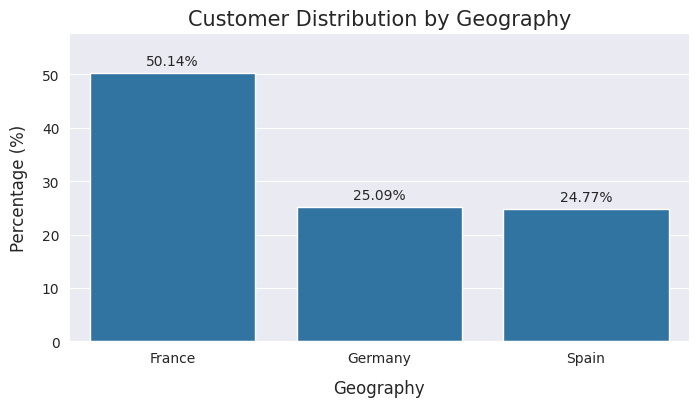

In [88]:
create_barplot(dataset, 'Geography', title='Customer Distribution by Geography')

One half of the customers are from France, the other half is split almost equally between Spain and Germany.

### 'Gender' Column

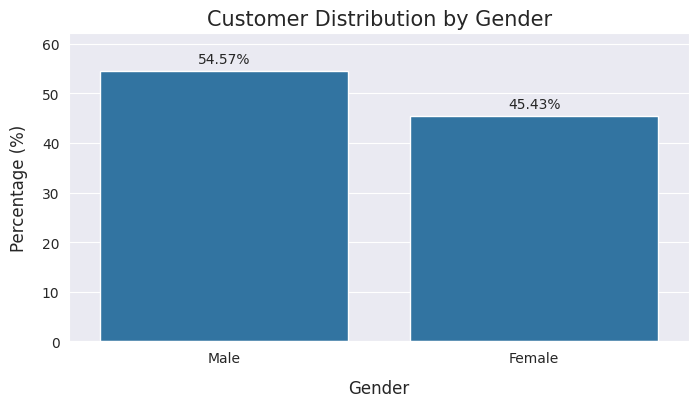

In [89]:
create_barplot(dataset, 'Gender', title='Customer Distribution by Gender')

About 55% customers are male and 45% customers are female.

### 'Age' Column

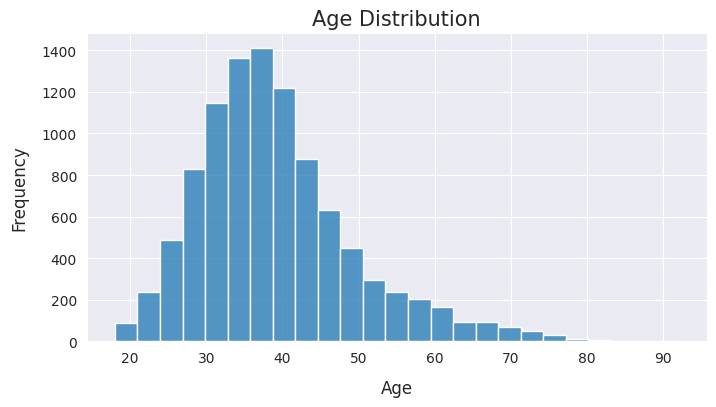

In [90]:
create_histogram(dataset, column_name='Age', bins=25)

The age histogram is right-skewed, however, it also appears somewhat normal. Because the distribution is right-skewed, the mean is pulled to the right, making it slightly higher than the median value. The mean age of the customers is 39, with a standard deviation of nearly 10. The youngest customer is aged 18, which shows that all customers are adults.

### 'Tenure' Column

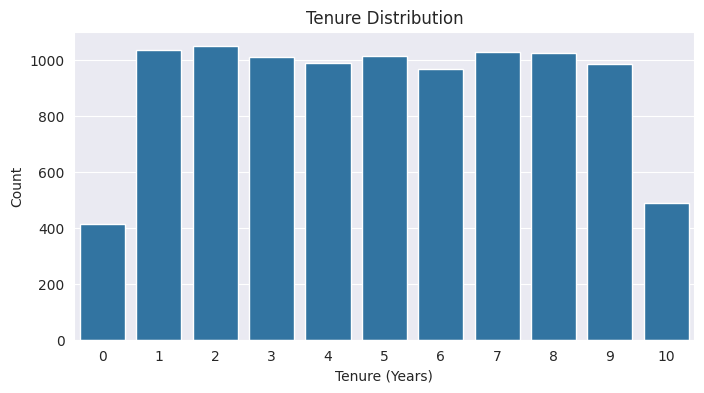

In [91]:
create_countplot(dataset, column_name='Tenure', xlabel='Tenure (Years)', ylabel='Count')

The tenure values are approximately uniformly distributed from 1 to 9, with the tenure of 0 and 10 years being the least common. Therefore, most customers have an association with the company between 1 and 9 years.

### 'Balance' Column

#### Distribution of 'Balance' Values

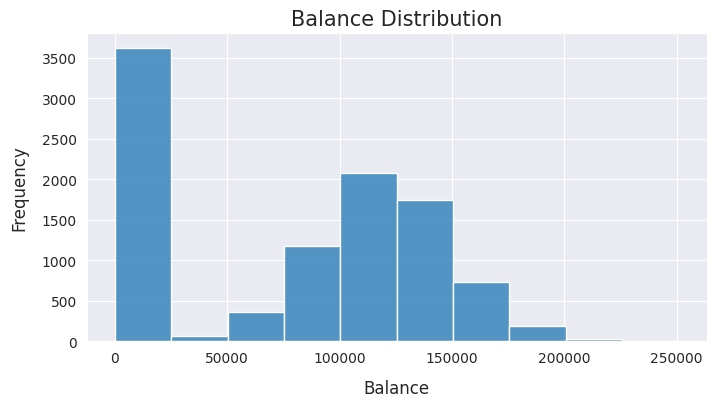

In [92]:
create_histogram(dataset, column_name='Balance')

The distribution of balance histogram shows a normal distribution only from 25000 to 225000. However, more than one quarter of the total customers have a balance of 0, which is reflected by the peak at the left of the distribution, and this pulls the mean to the left significantly. The mean value is approximately 76000 with a standard deviation of 62000.

#### Spread of 'Balance' Values

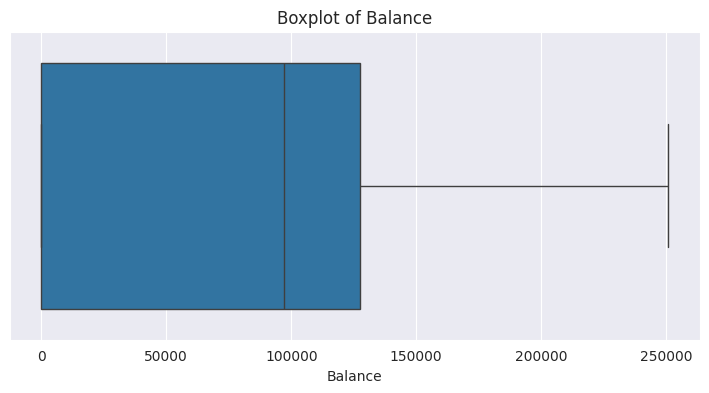

In [93]:
create_boxplot(dataset, column_name='Balance')

The boxplot shows that a significant number of customers have a balance less than 100000, and over a quarter of the customer base has a balance greater than 125000. The maximum value occurs at around 250000 and there are no outliers.

### 'NumOfProducts' Column

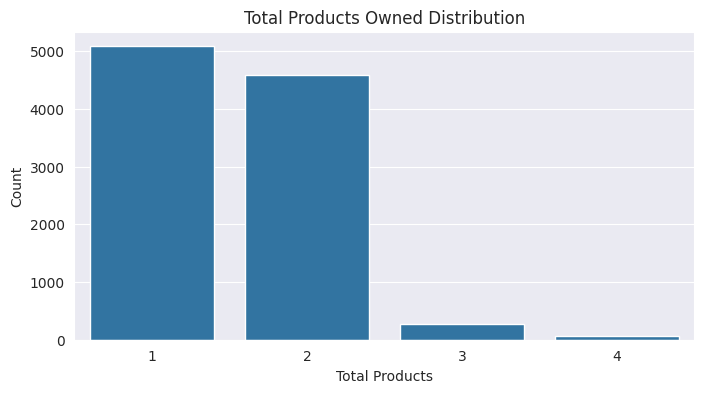

In [94]:
create_countplot(dataset, column_name='NumOfProducts', title='Total Products Owned Distribution', xlabel='Total Products', ylabel='Count')

About one half of the customers own at least one product of the company, with a significant customer base owning 2 products. However, a very small portion owns 3 or 4 products.

### 'HasCrCard' Column

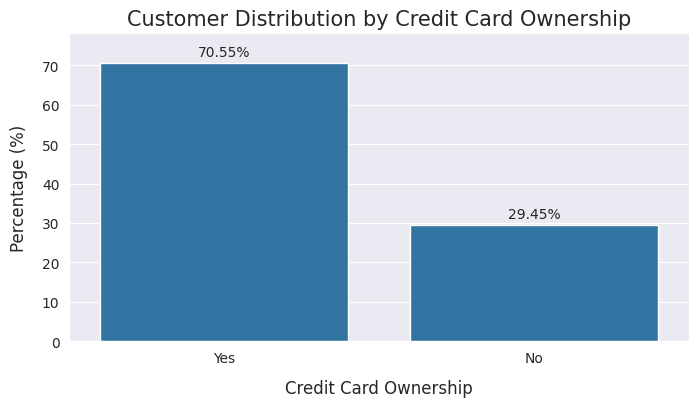

In [95]:
dataset['HasCrCard'] = dataset['HasCrCard'].replace({1: 'Yes', 0: 'No'})

create_barplot(dataset, 'HasCrCard', title='Customer Distribution by Credit Card Ownership', xlabel='Credit Card Ownership')

About 70% of the customers own a credit card, and the remaining 30% do not own one.

### 'IsActiveMember' Column

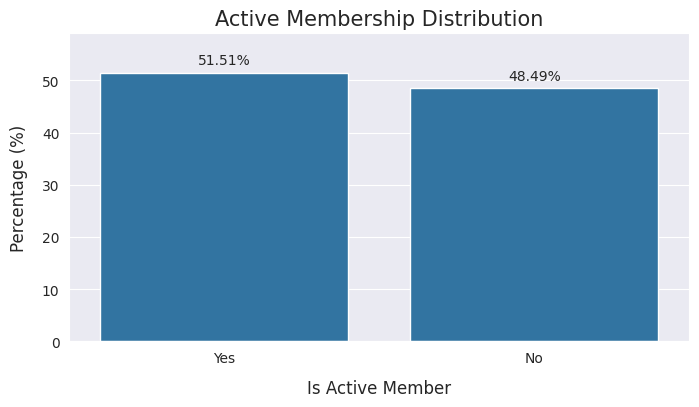

In [96]:
dataset['IsActiveMember'] = dataset['IsActiveMember'].replace({1: 'Yes', 0: 'No'})

create_barplot(dataset, 'IsActiveMember', title='Active Membership Distribution', xlabel='Is Active Member')

The customers who are active members are slightly higher in proportion than the ones who are inactive.

### 'EstimatedSalary' Column

#### Distribution of 'EstimatedSalary' Values

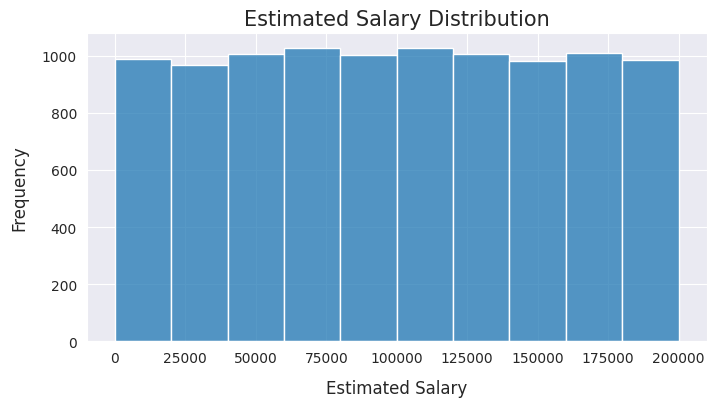

In [97]:
create_histogram(dataset, column_name='EstimatedSalary', title='Estimated Salary Distribution', xlabel='Estimated Salary')

The estimated salary distribution is approximately uniformly distributed, with values ranging from approximately 0 to 200000, with a mean of 100000.

#### Spread of 'EstimatedSalary' Values

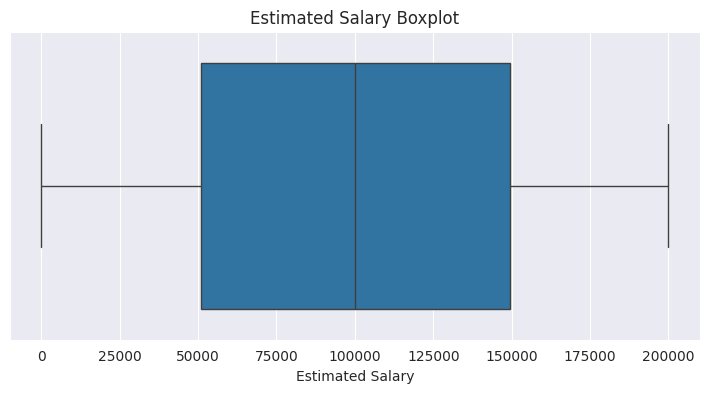

In [98]:
create_boxplot(dataset, column_name='EstimatedSalary', title='Estimated Salary Boxplot', xlabel='Estimated Salary')

The boxplot couldn't be more perfect, with the median value almost equal to the mean value. There are no outliers.

### 'Exited' Column

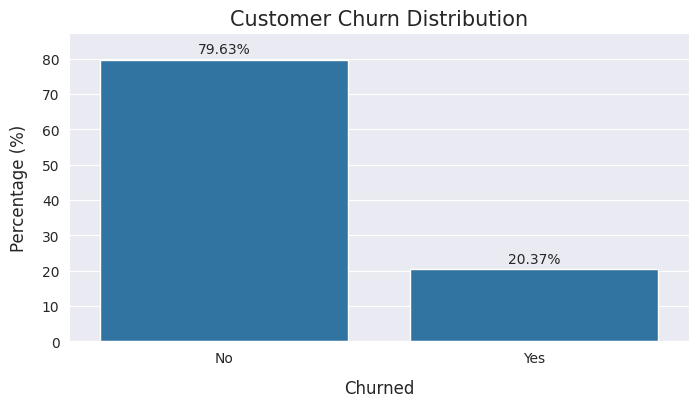

In [99]:
dataset['Exited'] = dataset['Exited'].replace({1: 'Yes', 0: 'No'})

create_barplot(dataset, column_name='Exited', title='Customer Churn Distribution', xlabel='Churned')

About 20% of the customers have churned, there couldn't be more explanation to this.

## 4. Data Validation and Cleaning
This data set has 10,000 rows and 14 columns. I have validated all variables and have not made any changes after validation. All the columns are just as described in the data dictionary:

- **RowNumber**: numeric values, unique identifier of each row. No cleaning is needed.

- **CustomerId**: numeric values, unique identifer for each customer. No cleaning is needed.

- **Surname**: character values, the surname of each customer. No cleaning is needed.

- **CreditScore**: numeric values, the credit score of each customer. No cleaning is needed.

- **Geography**: character values with 3 unique values (categories), the country from which the customer belongs. It's data type will be changed from object to categorical.

- **Gender**: character values with 2 unique values (categories), the gender of the customer. It's data type will be changed from object to categorical.

- **Age**: numerical values, the age of the customer. No cleaning is required.

- **Tenure**: numerical values, the customer's time of bond with the company. No cleaning is required.

- **Balance**: numerical values, the account balance of the customer. No cleaning is required.

- **NumOfProducts**: numerical values, the products they own. No cleaning is required.

- **HasCrCard**: character values with 2 unique values (categories), whether the customer owns a credit card or not. It's data type will be changed from object to categorical.

- **IsActiveMember**: character values with 2 unique values (categories), whether the customer is an active member of the company. It's data type will be changed from object to categorical.

- **EstimatedSalary**: numerical values, the estimated salary of the customer. No cleaning is needed.

- **Exited**: character values with 2 unique values (categories), the target variable indicating whether the customer has churned. It's data type will be changed from object to categorical.

### Overview of Missing Values

In [100]:
dataset.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Data Cleaning

In [101]:
# Convert columns to 'category' dtype
category_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
dataset[category_cols] = dataset[category_cols].astype('category')

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(6), object(1)
memory usage: 752.7+ KB


## 5. Exploratory Data Analysis

### Credit Score Spread by Churn Status


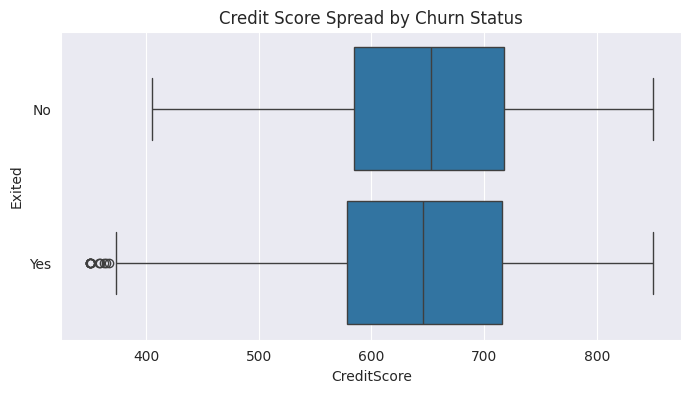

In [103]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='CreditScore', y='Exited', data=dataset)
plt.title('Credit Score Spread by Churn Status')
plt.show()

The customers who churned tend to have a slightly lower credit score than the ones who didn't churn. The above boxplot shows that for customers who churned, the credit score values have a greater spread than for customers who didn't, however, that spread is greater at the lower end, with many outliers. Nevertheless, the median credit score values are only slightly different for customers who churned versus those who didn't, which could mean that credit score doesn't have a significant impact on customer churn.

### Relationship Between Churn Status and Geography


<Figure size 800x400 with 0 Axes>

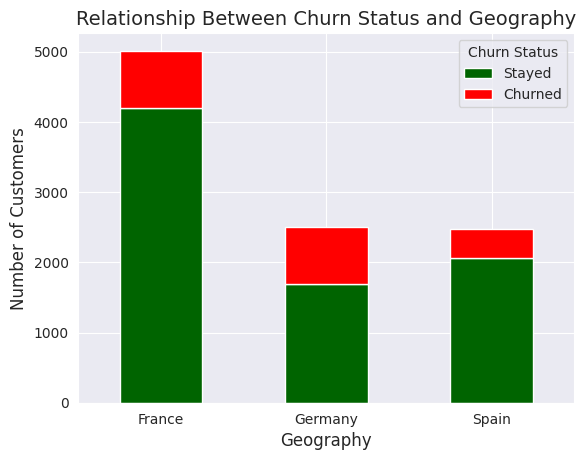

In [104]:
plt.figure(figsize=(8, 4))
pd.crosstab(dataset['Geography'], dataset['Exited']).plot(kind='bar', stacked=True, color=['darkgreen', 'red'])

plt.title('Relationship Between Churn Status and Geography', fontsize=14)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Stayed', 'Churned'], title='Churn Status')
plt.show()

France and Spain both have a small portion of their customer base who churned, however, customers from Germany are an exception, as more than one-third of German customers have churned. Customers from Germany seem particularly dissatisfied. Let's look at the customers who churned more closely.

<Figure size 800x400 with 0 Axes>

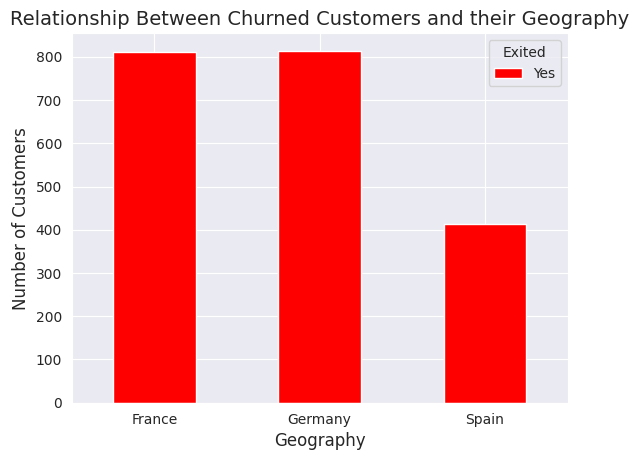

In [105]:
churned = dataset.query("Exited == 'Yes'")

plt.figure(figsize=(8, 4))
pd.crosstab(churned['Geography'], churned['Exited']).plot(kind='bar', stacked=True, color='red')

plt.title('Relationship Between Churned Customers and their Geography', fontsize=14)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Although customers who churned from France and Germany are almost equivalent, the fact that more than a third of German customers have churned shows an interesting fact.

### Relationship between Churn Status and Customer's Gender


<Figure size 800x400 with 0 Axes>

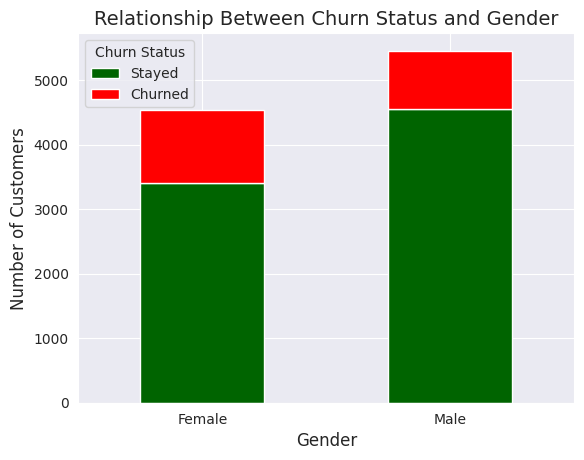

In [106]:
plt.figure(figsize=(8, 4))
pd.crosstab(dataset['Gender'], dataset['Exited']).plot(kind='bar', stacked=True, color=['darkgreen', 'red'])

plt.title('Relationship Between Churn Status and Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Stayed', 'Churned'], title='Churn Status')
plt.show()

Even though the customers who have churned have a higher proportion of females, it is worth noting that more than a quarter of female customers have churned, despite there being considerably more male customers than female customers, which means females have a higher potential of churning than males.

### Relationship between Age and Churn Status

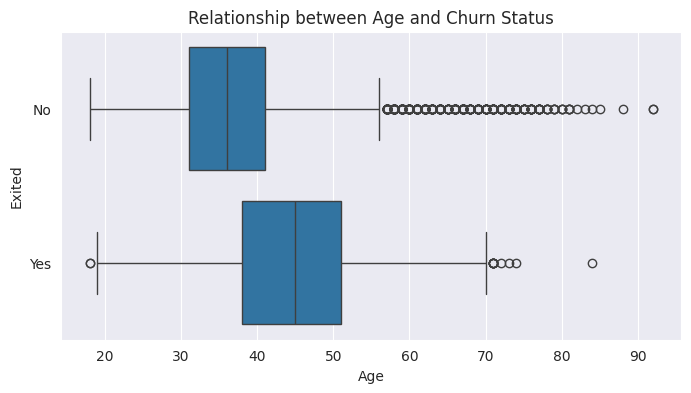

In [107]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Age', y='Exited', data=dataset)
plt.title('Relationship between Age and Churn Status')
plt.show()

An interesting pattern is coming to light, the median age of customers who have churned is around 45, whereas that for customers who haven't churned is around 36, and for such customers, any customer with an age greater than 56 is considered an outlier, which means that is unusual, but which is not unusual for those customers who have churned. Therefore, it can be concluded that customer churn depends on the age of it's customers, and the probability of churning increases with age.

### Relationship between Balance and Churn Status

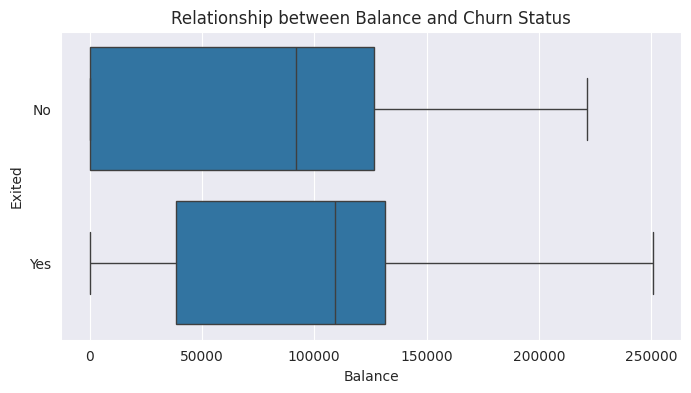

In [108]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Balance', y='Exited', data=dataset)
plt.title('Relationship between Balance and Churn Status')
plt.show()

The boxplot suggests that balance has a relationship with churn status, that is, customers who have churned have a higher median balance than those who haven't churned, which could mean that probability of churning increases with the balance of a customer. Most of the customers with a balance of 0 are those who haven't churned.

### Relationship Between Churn Status and Credit Card Ownership

<Figure size 800x400 with 0 Axes>

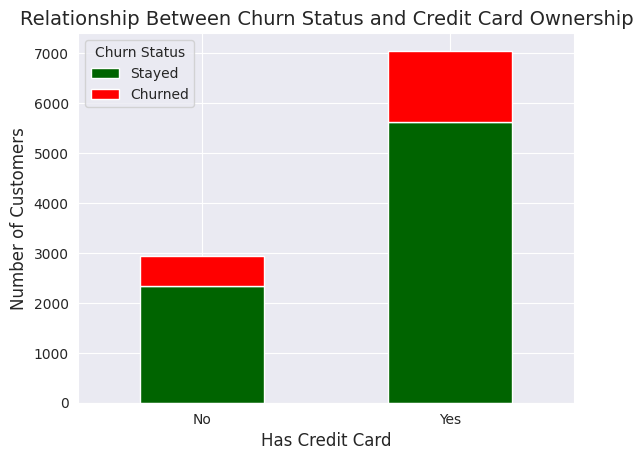

In [109]:
plt.figure(figsize=(8, 4))
pd.crosstab(dataset['HasCrCard'], dataset['Exited']).plot(kind='bar', stacked=True, color=['darkgreen', 'red'])

plt.title('Relationship Between Churn Status and Credit Card Ownership', fontsize=14)
plt.xlabel('Has Credit Card', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Stayed', 'Churned'], title='Churn Status')
plt.show()

Most of the churned customers have a credit card, which clearly shows that having a credit card increases the chances of churning.

### Correlation Heatmap between Numeric Features


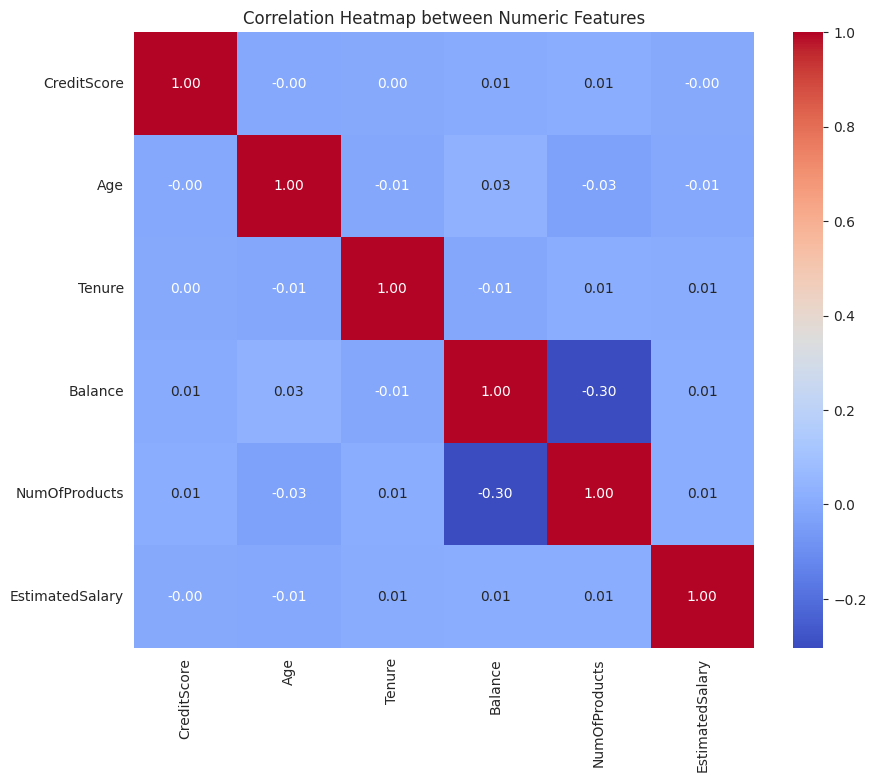

In [110]:
numeric_df = dataset.select_dtypes(include=['number']).drop(columns=['RowNumber', 'CustomerId'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Numeric Features')
plt.show()

The correlation heatmap between the numeric features of the dataset shows that almost all of these variables are not at all correlated with each other, which indicates feature independence, however, NumOfProducts is somewhat negatively correlated with Balance, though it's still not that much.

## 6. Data Preprocessing
Following steps will be taken to preprocess the dataset:

- Normalize the numeric features
- Convert the categorical variables into numeric features
- Split the data into a training set and a test set

In [111]:
# Encode binary columns using LabelEncoder
binary_columns = ['Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
dataset[binary_columns] = dataset[binary_columns].apply(LabelEncoder().fit_transform)

# Separate features (X) and target (y)
X = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = dataset['Exited']

# Identify numeric features for scaling
numeric_features = X.select_dtypes(include=['number']).columns.tolist()

# Identify categorical features for encoding
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create a pipeline for numeric feature transformation (scaling)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Create a pipeline for categorical feature transformation (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))])

# Define the column transformer that applies different transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

## 7. Model Fitting and Evaluation
This is a binary classification problem where the target is 'Exited'. I am choosing three models, the Logistic Regression model, Random Forest and XGBoost Models.

For evaluation, I'm choosing recall and accuracy.

### Logistic Regression Model

In [112]:
logistic_regression = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', LogisticRegression(random_state=42))])

# Fit the model
logistic_regression.fit(X_train, y_train)

# Predictions for baseline model
y_pred_baseline = logistic_regression.predict(X_test)
y_pred_proba_baseline = logistic_regression.predict_proba(X_test)[:, 1]

# Evaluation Metrics For Logistic Regression (Baseline Model)
recall_baseline = recall_score(y_test, y_pred_baseline)
accuracy_logreg = accuracy_score(y_test, y_pred_baseline)

# Print results for Logistic Regression
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print("Baseline Model (Logistic Regression):")
print(f"Recall: {recall_baseline:.4f}")

Logistic Regression Model:
Accuracy: 0.8133
Baseline Model (Logistic Regression):
Recall: 0.1538


### Random Forest Classifier

In [113]:
# Define parameter grid for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False],
}

# Create the RandomForest model pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='f1'
)

# Fit the model with the training data
random_search.fit(X_train, y_train)

# Get the best estimator (model) after hyperparameter tuning
best_rf_model = random_search.best_estimator_

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
recall_rf = recall_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print results for Random Forest
print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Random Forest Model:
Accuracy: 0.8540
Recall: 0.4517


### XGBoost Classifier

In [114]:
# Split the dataset into features (X) and target (y)
X = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = dataset['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Before creating DMatrix, convert categorical features to numerical using Label Encoding
for col in X.select_dtypes(include=['category']).columns.tolist() + ['Exited']:
    le = LabelEncoder()
    if col in X_train.columns:
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
    else:
        y_train = le.fit_transform(y_train)
        y_test = le.transform(y_test)

# Convert the datasets to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define important parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_xgb = bst.predict(dtest)
y_pred_xgb_binary = (y_pred_xgb > 0.5).astype(int)

# Calculating Evaluation Metrics
recall_xgb = recall_score(y_test, y_pred_xgb_binary)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_binary)

# Print results
print("XGBoost Model:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")

XGBoost Model:
Accuracy: 0.8708
Recall: 0.5206


### Evaluation Metrics
Since the focus is on correctly classifying customers at risk of churning, recall is the primary metric of evaluation, but it also has to be balanced with the accuracy of the model, therefore, accuracy is the secondary evaluation metric.

### Models Comparison
According to our chosen evaluation metrics of Recall and Accuracy, the Logistic Regression model performs poorly, with a recall of about 0.15 and an accuracy of 0.813. The fine-tuned Random Forest model has a recall of 0.45 and an accuracy of 0.854. Finally, the XGBoost model has a recall of 0.52 and an accuracy of 0.87. Therefore, the XGBoost model performs the best for this dataset.

## 8. Business Metrics
The business should monitor Recall to ensure customers at risk of churning are correctly identified and Accuracy is still a valuable metric to track to ensure overall model quality.


---


### Monitoring:
Track recall to identify at-risk customers and accuracy to maintain prediction quality. Regularly evaluate these metrics on new data.

---


### Initial Values:
Based on the current data, initial estimates are:

- **Recall**: ~ 0.52 (accurately identifying 52% of customers at risk of churning)
- **Accuracy**: ~ 0.87

## 9. **Final Summary and Recommendations:**
Based on the analysis done, the recommendations that can be followed to improve customer retention are:

<br>

#### **Target Customers with Low Credit Scores**
Identify customers with low credit scores and offer personalized retention plans, like credit score improvement programs or special incentives to build loyalty.

<br>

#### **Focus on German Customers**
Investigate why many German customers churn. Use surveys or interviews to understand their concerns, then create localized offers, support, and loyalty programs based on feedback.

<br>

#### **Address Female Customers' Higher Likelihood to Churn**
Analyze why female customers churn more. Create retention campaigns with personalized offers and ensure they receive adequate support to reduce churn.

<br>

#### **Incentivize Customers with Higher Balances to Stay**
Offer high-balance customers loyalty programs or premium services to keep them engaged, such as personalized financial products or special savings plans.

<br>

#### **Retain Credit Card Owners**
Engage credit card holders with rewards, cashback, or exclusive offers to prevent churn. Review credit card offerings to ensure they meet customer needs.

<br>

#### **Use Customer Age Data to Improve Retention**
Create age-specific strategies, like discounts for seniors or retirement planning for customers aged greater than a certain threshold, in this case, it could be 40, to keep them engaged and reduce churn.

<br>

#### **Prioritize Recall and Accuracy in Customer Churn Prediction**
Regularly update and improve the churn prediction model. Focus on recall to catch at-risk customers and ensure accuracy to maintain quality predictions.

<br>

#### **Continuous Customer Engagement and Feedback**
Use surveys and feedback loops to understand why customers churn. Gather insights after key interactions and use this data to improve retention strategies.

These actions will help retain customers at risk of churning.